<a href="https://colab.research.google.com/github/Lucena-Marcos/Analise_Acoes/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

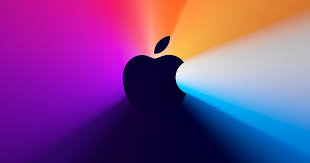

# **STOCK PRICE PREDICTION**


---







In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get the sock quote
# novo modo de retirar historico de ações diretamente do yahoo
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# show the data
df

In [ ]:
# get the number of rowns e columns in the data set
# confere com a informação acima
df.shape

In [ ]:
# Visualize the closing price history
# grafico pelo matplotlib

# definindo o tamanho do grafico
plt.figure(figsize=(16,8))
# definindo o titulo
plt.title("Close Price History")
# pedindo para plotar as indormações de fechamento
plt.plot(df['Close'])
# definindo o texto abaixo do grafico e seu tamanho
plt.xlabel("Date", fontsize=18)
# definindo o texto no angulo y e seu tamanho
plt.ylabel('Close Price USD ($)', fontsize=18)
# mostrar o grafico
plt.show()

In [ ]:
# Creat a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Converter the dataframe to a Numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
# Create the training data set
# Creat the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshepa the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


In [ ]:
# Create teh etsting data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Creat the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
# Convert the data to a numpay array
x_test =  np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root main squared erro (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test )**2)
rmse

In [ ]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize thhe data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'val','Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

In [ ]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end = '2019-12-17')
# Creat new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day Closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 an 1
last_60_days_scaled = scaler.transform(last_60_days)
# Creat an empty list
x_test = []
# append the past 60 days
x_test.append(last_60_days_scaled)
# Convert the x_test data set to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
# Get the predicted scale price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


In [ ]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end = '2019-12-18')
print(apple_quote['Close'])